# 1. Conformance Classification

### Import Event Log

In [33]:
import pandas as pd
import numpy as np
import pm4py
from pm4py.objects.conversion.log import converter as log_converter


if __name__ == "__main__":
    # Read the CSV file
    dataframe_log = pd.read_csv('../../data/logs/mobis.csv', sep=',')  

    # Drop the first column without knowing its name
    dataframe_log = dataframe_log.drop(dataframe_log.columns[0], axis=1)

    # Format the dataframe
    dataframe_log = pm4py.format_dataframe(
        dataframe_log, 
        case_id='case', 
        activity_key='activity', 
        timestamp_key='start'
    )

    # Convert the dataframe to event log
    log = log_converter.apply(dataframe_log)
    
dataframe_log

/var/folders/s_/ch_w_j2d0sqf6dbdc0_224m40000gq/T/ipykernel_64912/1672979557.py:15: DeprecatedWarning: format_dataframe is deprecated as of 2.3.0 and will be removed in 3.0.0. the format_dataframe function does not need application anymore.
  dataframe_log = pm4py.format_dataframe(


,activity,start,end,type,user,travel_start,travel_end,case,cost,case:concept:name,concept:name,time:timestamp,@@index,@@case_index
0,file travel request,2017-01-17 11:17:00+00:00,2017-01-17 11:23:00+00:00,Employee,JB8510,2017-10-01 00:00:00+00:00,2017-01-15 00:00:00+00:00,105,NaN,105,file travel request,2017-01-17 11:17:00+00:00,0,0
1,check if travel request needs preliminary pric...,2017-01-17 11:23:00+00:00,2017-01-17 11:24:00+00:00,Employee,JB8510,2017-10-01 00:00:00+00:00,2017-01-15 00:00:00+00:00,105,NaN,105,check if travel request needs preliminary pric...,2017-01-17 11:23:00+00:00,1,0
2,decide on approval requirements,2017-01-17 11:24:00+00:00,2017-01-17 11:24:00+00:00,Employee,JB8510,2017-10-01 00:00:00+00:00,2017-01-15 00:00:00+00:00,105,NaN,105,decide on approval requirements,2017-01-17 11:24:00+00:00,2,0
3,check if booking is necessary,2017-01-17 11:24:00+00:00,2017-01-17 11:40:00+00:00,Travel Department,KS9688,2017-10-01 00:00:00+00:00,2017-01-15 00:00:00+00:00,105,NaN,105,check if booking is necessary,2017-01-17 11:24:00+00:00,3,0
4,check if expense documents exist,2017-01-18 05:59:00+00:00,2017-01-18 06:31:00+00:00,Employee,JB8510,2017-10-01 00:00:00+00:00,2017-01-15 00:00:00+00:00,105,NaN,105,check if expense documents exist,2017-01-18 05:59:00+00:00,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55804,confirm travel expense report,2017-11-22 06:48:00+00:00,2017-11-22 06:50:00+00:00,Employee,KI9211,2017-11-19 00:00:00+00:00,2017-11-20 00:00:00+00:00,6348,NaN,6348,confirm travel expense report,2017-11-22 06:48:00+00:00,55804,3353
55805,decide on travel expense approval,2017-11-22 12:59:00+00:00,2017-11-22 13:06:00+00:00,Manager,AK7488,2017-11-19 00:00:00+00:00,2017-11-20 00:00:00+00:00,6348,NaN,6348,decide on travel expense approval,2017-11-22 12:59:00+00:00,55805,3353
55806,send original documents to archive,2017-11-29 20:12:00+00:00,2017-11-29 20:24:00+00:00,Employee,KI9211,2017-11-19 00:00:00+00:00,2017-11-20 00:00:00+00:00,6348,NaN,6348,send original documents to archive,2017-11-29 20:12:00+00:00,55806,3353
55807,calculate payments,2017-12-08 09:32:00+00:00,2017-12-08 09:55:00+00:00,Accounting,FQ3758,2017-11-19 00:00:00+00:00,2017-11-20 00:00:00+00:00,6348,NaN,6348,calculate payments,2017-12-08 09:32:00+00:00,55807,3353


### Discover Process Model

In [34]:
import pm4py
net, initial_marking, final_marking = pm4py.discover_petri_net_inductive(log, noise_threshold=0.2)

/opt/anaconda3/lib/python3.9/site-packages/pm4py/utils.py:495: UserWarning: the EventLog class has been deprecated and will be removed in a future release.
  warnings.warn("the EventLog class has been deprecated and will be removed in a future release.")


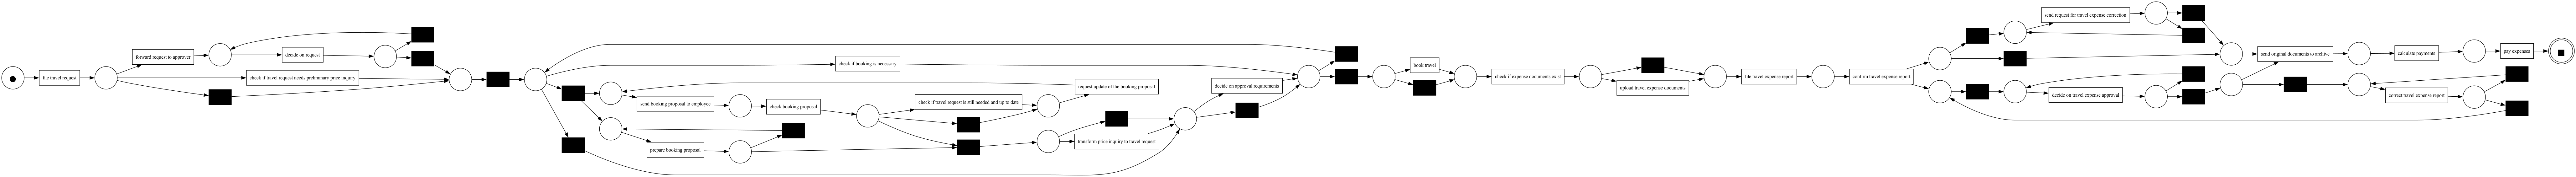

In [35]:
pm4py.view_petri_net(net, initial_marking, final_marking)

### Alignment between discovered model and log

In [36]:
def generate_alignments_adjusted_tracecost_pkl(log, net, initial_marking, final_marking):
    from pm4py.algo.conformance.alignments.petri_net import algorithm as alignments
    from pm4py.algo.conformance.alignments.petri_net import variants
    from pm4py.objects.petri_net.utils import align_utils
    max_events=0
    for trace in log:
        counter=0
        for event in trace:
            counter+=1
        if counter > max_events:
            max_events=counter
    parameters={}
    parameters[alignments.Variants.VERSION_STATE_EQUATION_A_STAR.value.Parameters.PARAM_SYNC_COST_FUNCTION] = list(map(lambda i: .1*i, range(max_events*2)))
    parameters[alignments.Variants.VERSION_STATE_EQUATION_A_STAR.value.Parameters.PARAM_TRACE_COST_FUNCTION]=list(map(lambda i: align_utils.STD_MODEL_LOG_MOVE_COST-.1*i, range(max_events*2)))
    aligned_traces = alignments.apply_log(log, net, initial_marking, final_marking, variant=variants.state_equation_a_star, parameters=parameters)
    return aligned_traces

In [37]:
alignment_discovered_model = generate_alignments_adjusted_tracecost_pkl(log, net, initial_marking, final_marking)

aligning log, completed variants ::   0%|          | 0/295 [00:00<?, ?it/s]

### Alignment between ground truth model and log

In [38]:
import pm4py
from pm4py.objects.log.importer.xes import importer as xes_importer
from pm4py.objects.bpmn.importer import importer as bpmn_importer
from pm4py.algo.conformance.alignments.petri_net import algorithm as alignments_petri

# 2. Import the given BPMN model
bpmn_graph = bpmn_importer.apply("../../data/model/MobisToBe.bpmn")

# 3. Convert the BPMN to a Petri net
net2, initial_marking2, final_marking2 = pm4py.convert_to_petri_net(bpmn_graph)

alignment_ground_truth = generate_alignments_adjusted_tracecost_pkl(log, net2, initial_marking2, final_marking2)

aligning log, completed variants ::   0%|          | 0/295 [00:00<?, ?it/s]

In [39]:
import pm4py
from pm4py.objects.log.importer.xes import importer as xes_importer
from pm4py.objects.bpmn.importer import importer as bpmn_importer
from pm4py.algo.conformance.alignments.petri_net import algorithm as alignments_petri

# 2. Import the given BPMN model
bpmn_graph = bpmn_importer.apply("../../data/model/Model_RequestForPayment.bpmn")

# 3. Convert the BPMN to a Petri net
net2, initial_marking2, final_marking2 = pm4py.convert_to_petri_net(bpmn_graph)

alignment_ground_truth = generate_alignments_adjusted_tracecost_pkl(log, net2, initial_marking2, final_marking2)

aligning log, completed variants ::   0%|          | 0/295 [00:00<?, ?it/s]

# 1. Conformance Classification

In [40]:
# Extract fitness values
alignment_ground_truth_fitness = [trace['fitness'] for trace in alignment_ground_truth]
alignment_discovered_model_fitness = [trace['fitness'] for trace in alignment_discovered_model]

# Create DataFrame
df_fitness = pd.DataFrame({
    'ground_truth_fit': alignment_ground_truth_fitness,
    'predicted_fit': alignment_discovered_model_fitness
})

In [41]:
df_fitness

,ground_truth_fit,predicted_fit
0,0.86,1.000000
1,0.74,0.990476
2,0.82,1.000000
3,0.71,1.000000
4,0.77,1.000000
...,...,...
3349,0.87,1.000000
3350,0.83,1.000000
3351,0.84,0.980952
3352,0.84,0.980952


In [42]:
# deviating: 1
# conform: 0

df_conformance = pd.DataFrame()
df_conformance['actual'] = df_fitness['ground_truth_fit'].apply(lambda x: 1 if x < 1 else 0)
df_conformance['predicted'] = df_fitness['predicted_fit'].apply(lambda x: 1 if x < 1 else 0)

In [43]:
df_conformance

,actual,predicted
0,1,0
1,1,1
2,1,0
3,1,0
4,1,0
...,...,...
3349,1,0
3350,1,0
3351,1,1
3352,1,1


In [44]:
# Calculating TP, TN, FP, FN
TP = ((df_conformance['actual'] == 1) & (df_conformance['predicted'] == 1)).sum()
TN = ((df_conformance['actual'] == 0) & (df_conformance['predicted'] == 0)).sum()
FP = ((df_conformance['actual'] == 0) & (df_conformance['predicted'] == 1)).sum()
FN = ((df_conformance['actual'] == 1) & (df_conformance['predicted'] == 0)).sum()

In [45]:
precision_dev = TN / (TN + FN)
print(f"Precision Dev: {precision_dev:.2f}")

Precision Dev: 0.00


In [46]:
recall_dev = TN / (TN + FP)
print(f"Recall Dev: {recall_dev:.2f}")

Recall Dev: nan


/var/folders/s_/ch_w_j2d0sqf6dbdc0_224m40000gq/T/ipykernel_64912/1057832943.py:1: RuntimeWarning: invalid value encountered in long_scalars
  recall_dev = TN / (TN + FP)


In [47]:
precision_no_d = TP / (TP + FP)
print(f"Precision No Dev: {precision_no_d:.2f}")

Precision No Dev: 1.00


In [48]:
recall_no_d = TP / (TP + FN)
print(f"Recall No Dev: {recall_no_d:.3f}")

Recall No Dev: 0.182


In [49]:
from sklearn.metrics import roc_auc_score

auc_roc = roc_auc_score(df_conformance['actual'], df_conformance['predicted'])
print(f"AUC-ROC: {auc_roc:.2f}")

ValueError: Only one class present in y_true. ROC AUC score is not defined in that case.

# 2. Conformance Diagnostics

In [ ]:
# Diagnostics only for deviating traces:

# Find indices where 'predicted' column has value 1
indices_to_keep = df_conformance[df_conformance['predicted'] == 1].index.tolist()

# Filter the lists to keep only the indices where 'predicted' is 1
alignment_discovered_model = [alignment_discovered_model[i] for i in indices_to_keep]
alignment_ground_truth = [alignment_ground_truth[i] for i in indices_to_keep]

In [ ]:
# Function to extract log and model moves excluding (None, >>) and (>>, None)
def extract_moves(alignment):
    log_moves = [move for move in alignment if move[1] == '>>' and move[0] is not None]
    model_moves = [move for move in alignment if move[0] == '>>' and move[1] is not None]
    return log_moves, model_moves

# Initialize counts for moves
total_log_moves = 0
total_no_log_moves = 0
total_model_moves = 0
total_no_model_moves = 0

# Initialize counts for TP, FP, FN, TN
tp_log_moves = 0
fp_log_moves = 0
fn_log_moves = 0
tn_log_moves = 0

tp_model_moves = 0
fp_model_moves = 0
fn_model_moves = 0
tn_model_moves = 0

# Iterate through aligned traces and count moves
for i, aligned_trace in enumerate(alignment_ground_truth):
    log_moves_gt, model_moves_gt = extract_moves(aligned_trace['alignment'])
    total_log_moves += len(log_moves_gt)
    total_no_log_moves += sum(1 for move in aligned_trace['alignment'] if move[1] != '>>' or move[0] is None)
    total_model_moves += len(model_moves_gt)
    total_no_model_moves += sum(1 for move in aligned_trace['alignment'] if move[0] != '>>' or move[1] is None)
    
    if i < len(alignment_discovered_model):
        log_moves_input, model_moves_input = extract_moves(alignment_discovered_model[i]['alignment'])
        
        # Calculate TP, FP, FN, TN for log moves
        tp_log_moves += sum(1 for move in log_moves_gt if move in log_moves_input)
        fn_log_moves += sum(1 for move in log_moves_gt if move not in log_moves_input)
        fp_log_moves += sum(1 for move in log_moves_input if move not in log_moves_gt)
        tn_log_moves += sum(1 for move in aligned_trace['alignment'] if move not in log_moves_gt and move not in log_moves_input and move[1] != '>>' and move[0] != '>>')
        
        # Calculate TP, FP, FN, TN for model moves
        tp_model_moves += sum(1 for move in model_moves_gt if move in model_moves_input)
        fn_model_moves += sum(1 for move in model_moves_gt if move not in model_moves_input)
        fp_model_moves += sum(1 for move in model_moves_input if move not in model_moves_gt)
        tn_model_moves += sum(1 for move in aligned_trace['alignment'] if move not in model_moves_gt and move not in model_moves_input and move[1] != '>>' and move[0] != '>>')

# Calculate recall, precision, F1 score for log moves
recall_log_moves = tp_log_moves / (tp_log_moves + fn_log_moves) if (tp_log_moves + fn_log_moves) > 0 else 0
precision_log_moves = tp_log_moves / (tp_log_moves + fp_log_moves) if (tp_log_moves + fp_log_moves) > 0 else 0

# Calculate recall, precision, F1 score for model moves
recall_model_moves = tp_model_moves / (tp_model_moves + fn_model_moves) if (tp_model_moves + fn_model_moves) > 0 else 0
precision_model_moves = tp_model_moves / (tp_model_moves + fp_model_moves) if (tp_model_moves + fp_model_moves) > 0 else 0



# Print results for log moves
print(f"Precision (Log Moves): {precision_log_moves:.2f}")
print(f"Recall (Log Moves): {recall_log_moves:.2f}")
print("")

# Print results for model moves
print(f"Precision (Model Moves): {precision_model_moves:.2f}")
print(f"Recall (Model Moves): {recall_model_moves:.2f}")

Precision (Log Moves): 0.16
Recall (Log Moves): 0.27

Precision (Model Moves): 0.24
Recall (Model Moves): 0.51


In [ ]:
# Filter the other dataframe using the indices_to_keep
df_fitness = df_fitness.loc[indices_to_keep]

In [ ]:
from sklearn.metrics import mean_squared_error

# Calculate MSE
mse = mean_squared_error(df_fitness['ground_truth_fit'], df_fitness['predicted_fit'])

# Print the MSE restricted to 4 decimal places
print(f"The Mean Squared Error (MSE) is: {mse:.4f}")

The Mean Squared Error (MSE) is: 0.0042
